In [884]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500) 
%matplotlib inline

import plotly
import plotly.plotly as py
import plotly.figure_factory as ff

import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plotly.__version__

import geopandas
import shapely

plotly.tools.set_credentials_file(username='ashu.ingenuity@gmail.com', api_key='yvO5VATu1byoKNShHVN0')

In [885]:
print(matplotlib.backends.backend)

module://ipykernel.pylab.backend_inline


# Reading Cancer death and new case rate of caner all over USA for Bkgd

In [886]:
death_usa = pd.read_csv('./data/background_analysis/All USA cancer death rate 2011-2015.csv')
case_usa = pd.read_csv('./data/background_analysis/All USA new cases rate 2011-2015.csv')

In [887]:
death_usa = death_usa.drop(['CancerType', 'Year', 'Sex', 'DeathCount','Population'], axis=1)
case_usa = case_usa.drop(['CancerType', 'Year', 'Sex', 'CaseCount','Population'], axis=1)

In [888]:
death_usa = death_usa.rename(index = str, columns = {'Area' : 'State', 'AgeAdjustedRate' : 'Death_Rate'}) 
case_usa = case_usa.rename(index = str, columns = {'Area' : 'State', 'AgeAdjustedRate' : 'Newcase_Rate'})

In [889]:
allUSA = pd.merge(death_usa, case_usa, on = 'State')

In [890]:
allUSA.describe()

Death_Rate  Newcase_Rate
count   51.000000     51.000000
mean   165.703922    452.419608
std     15.219947     30.821064
min    127.200000    375.500000
25%    155.850000    436.950000
50%    165.200000    457.800000
75%    175.450000    468.950000
max    199.300000    520.300000

All Types of Cancer, All Ages, All Races/Ethnicities, Male and Female, Rate per 100,000 people in year 2015

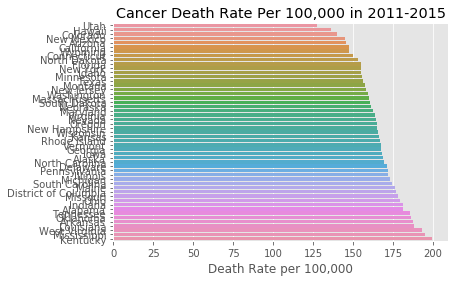

In [891]:
allUSA.sort_values(['Death_Rate'], inplace=True)
mean = allUSA.Death_Rate.mean()
ax = sns.barplot(x= 'Death_Rate', y='State', data= allUSA)
ax.set_xlabel('Death Rate per 100,000')
ax.set_ylabel('')
ax.set_title('Cancer Death Rate Per 100,000 in 2011-2015');

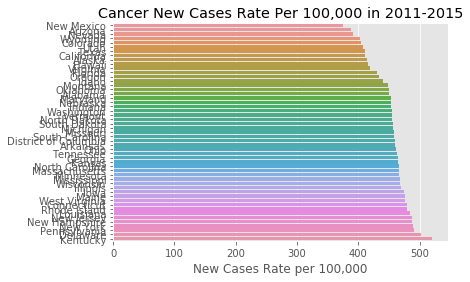

In [892]:
allUSA.sort_values(['Newcase_Rate'], inplace=True)
ax = sns.barplot(x= 'Newcase_Rate',  y='State', data= allUSA)
ax.set_xlabel('New Cases Rate per 100,000')
ax.set_ylabel('')
ax.set_title('Cancer New Cases Rate Per 100,000 in 2011-2015');

# Reading master data frame for EDA

In [1059]:
master = pd.read_csv('./master.csv')

In [1060]:
master.head()

FIPS    State    County  Life_Expectancy  Child_Mortality_Rate  \
0  13001  Georgia   Appling        74.553535             59.436970   
1  13003  Georgia  Atkinson        73.462140             69.199726   
2  13005  Georgia     Bacon        72.577063             69.199726   
3  13007  Georgia     Baker        76.226226             69.199726   
4  13009  Georgia   Baldwin        75.244221             97.237316   

   Infant_Mortality_Rate  pct_Diabetic  HIV_Prevalence_Rate  \
0               7.636473          12.9                172.0   
1               7.636473          12.8                240.8   
2               7.636473          12.4                468.6   
3               7.636473          16.5                296.9   
4               9.987516          12.4                319.9   

   pct_Food_Insecure  pct_Limited_Access_to_healthy_foods  \
0               14.3                             6.773041   
1               12.8                            12.267063   
2               13.2                             5.476352   
3               16.5                            30.546437   
4               22.6                             9.319845   

   Drug_Overdose_Mortality_Rate  MV_Mortality_Rate  pct_Insufficient_Sleep  \
0                      18.51183          23.225027               36.040842   
1                      18.51183          36.068220               38.392034   
2                      18.51183          31.690498               36.434163   
3                      18.51183          21.635442               37.560492   
4                      18.51183          15.711363               38.618257   

   Household_Income  pct_Homeowners  pct_below_18  pct_65_and_over  \
0             40862       71.859147     24.793478        17.266886   
1             34821       74.074074     27.307600        14.241189   
2             38417       70.719479     25.894514        15.434226   
3             37286       69.341408     19.843750        21.937500   
4             40358       55.137783     19.175611        15.594798   

   pct_African_American  pct_American_Indian_Alaskan_Native  pct_Asian  \
0             18.595108                            0.577723   0.788294   
1             16.099257                            1.498442   0.911053   
2             16.043820                            0.353388   0.600760   
3             44.593750                            0.468750   1.093750   
4             42.199261                            0.345165   1.719147   

   pct_Native_Hawaiian_Other_Pacific_Islander  pct_Hispanic  \
0                                    0.205173     10.258625   
1                                    1.066890     24.814193   
2                                    0.167859      8.905380   
3                                    0.062500      5.687500   
4                                    0.077941      2.280319   

   pct_Non_Hispanic_White  level_0  Years_of_Potential_Life_Lost_Rate  \
0               69.051347        1                       10749.968790   
1               56.808919        2                       10902.115783   
2               72.877463        3                       11414.503045   
3               47.312500        4                        9457.189341   
4               52.373848        5                        9659.224156   

   pct_Fair_Poor  Physically_Unhealthy_Days  Mentally_Unhealthy_Days  \
0      20.860321                   4.315623                 4.167643   
1      26.766415                   4.863178                 4.439941   
2      19.157643                   4.331201                 4.020762   
3      18.512541                   3.903933                 3.786131   
4      23.503294                   4.702728                 4.250728   

     pct_LBW  pct_Smokers  pct_Obese  Food_Environment_Index  \
0   9.866512    20.200401       36.1                     7.5   
1   7.602957    23.552669       32.1                     7.3   
2   9.456740    19.999158       33.0                     7.

In [1061]:
master = master.drop(['level_0'], axis=1)

In [1062]:
master = master.drop (['Presence_of_violation'], axis =1)

In [1063]:
#master.loc[master.County.str.contains('Union')]

#### Florida 'Union' county is outlier and we are replacing its cancer rate or death rate with median of Florida: Case_rate : 422.7 and Death_Rate: 174.90

In [1064]:
master.at[342, 'Case_Rate'] = 422.7
master.at[342, 'Death_Rate'] = 174.90

In [1065]:
#master.iloc[342]

In [1066]:
#master.info()

In [1067]:
master.groupby(['State']).median()

FIPS  Life_Expectancy  Child_Mortality_Rate  \
State                                                            
Alabama          1067.0        74.346572             69.199726   
Arkansas         5075.0        74.718329             69.199726   
Florida         12069.0        78.044311             60.056823   
Georgia         13161.0        76.073008             69.199726   
Louisiana       22064.0        75.239493             70.318014   
Mississippi     28082.0        74.106760             79.899557   
North Carolina  37100.0        76.884034             66.744682   
South Carolina  45046.0        75.772341             69.199726   
Tennessee       47095.0        74.688963             69.199726   
Texas           48254.0        76.976683             69.199726   
Virginia        51139.0        77.567857             69.199726   

                Infant_Mortality_Rate  pct_Diabetic  HIV_Prevalence_Rate  \
State                                                                      
Alabama                      7.636473         15.70           190.100000   
Arkansas                     7.636473         14.60           117.900000   
Florida                      7.470978         12.60           334.300000   
Georgia                      7.636473         13.60           262.490823   
Louisiana                    7.636473         13.00           264.550000   
Mississippi                  7.636473         15.00           260.600000   
North Carolina               7.636473         12.20           203.250000   
South Carolina               7.636473         14.85           352.200000   
Tennessee                    7.636473         14.20           112.800000   
Texas                        7.636473         10.80           184.800000   
Virginia                     7.636473         11.90           165.100000   

                pct_Food_Insecure  pct_Limited_Access_to_healthy_foods  \
State                                                                    
Alabama                     16.30                             5.854665   
Arkansas                    17.00                             9.407625   
Florida                     15.00                             8.643727   
Georgia                     16.80                             5.808733   
Louisiana                   17.15                             9.317930   
Mississippi                 19.70                             8.873288   
North Carolina              15.15                             5.088365   
South Carolina              15.95                             7.686841   
Tennessee                   13.80                             5.433948   
Texas                       14.95                             8.735539   
Virginia                    11.40                             3.953388   

                Drug_Overdose_Mortality_Rate  MV_Mortality_Rate  \
State                                                             
Alabama                            18.511830          24.368561   
Arkansas                           18.511830          25.205424   
Florida                            18.511830          17.744010   
Georgia                            18.511830          19.565643   
Louisiana                          18.511830          21.515568   
Mississippi                        18.511830          29.096717   
North Carolina                     19.154790          16.696392   
South Carolina                     18.511830          20.884696   
Tennessee                          20.282467          19.636060   
Texas                              18.511830          21.635442   
Virginia                           18.511830          16.409703   

                pct_Insufficient_Sleep  Household_Income  pct_Homeowners  \
State                                                                      
Alabama                      38.053334           41791.0       72.222047   
Arkansas                     34.736850           40495.0       70.723684   
Florida                      36.

DEATH RATE or NEW CASES FOR MULTIPLE DATA YEARS: Death rates are calculated based on the sum of the resident populations for each of the data years involved (e.g. the denominator of a rate for 2005-2011 combined is the sum of the population estimates for 2005, 2006, 2007, 2008, 2009, 2010 and 2011). 

# HealthyPeople.gov intitated a goal-oriented approach to reduce cancer deaths and set the targets for 2020.
### Baseline (Year): 179.3 (2007)
### Target: 161.4 for 2020
Target-Setting Method: 10 percent improvement
Numerator: Number of deaths due to cancer (ICD-10 codes C00-C97).

In 2013, rates for 2007–2009 were revised using intercensal population estimates based on the 2000 and 2010 censuses instead of the postcensal estimates for the denominator to provide more accurate rates for the period. Thus, the original baseline was revised from 178.4 to 179.3. The target was adjusted from 160.6 to 161.4 to reflect the revised baseline using the original target-setting method. Note that all mortality rates shown here for 2001–2009 (or any subset of those years) are based on intercensal population estimates and may differ from those previously published on the Internet or in print. In 2015, the denominator data source name was revised from Population Estimates to Bridged-Race Population Estimates for Census 2000 and 2010. The numerator data source, baseline estimate, target, and target-setting method remain unchanged. In 2017, the estimates for geographic location were updated to reflect the 2013 urban/rural classification scheme.
More Reading: https://www.healthypeople.gov/node/4047/data_details#revision_history_header

## Based on the target cancer death rate mentioned by healthypeople.gov I am categorizing the counties >161.4 for above baseline (ABL) or <161.4 to below base line (BBL). 

In [1076]:
master['BBL'] = master['Death_Rate'].apply(lambda x: 1 if x < 161.4  else 0)

In [1077]:
master.head()

FIPS    State    County  Life_Expectancy  Child_Mortality_Rate  \
0  13001  Georgia   Appling        74.553535             59.436970   
1  13003  Georgia  Atkinson        73.462140             69.199726   
2  13005  Georgia     Bacon        72.577063             69.199726   
3  13007  Georgia     Baker        76.226226             69.199726   
4  13009  Georgia   Baldwin        75.244221             97.237316   

   Infant_Mortality_Rate  pct_Diabetic  HIV_Prevalence_Rate  \
0               7.636473          12.9                172.0   
1               7.636473          12.8                240.8   
2               7.636473          12.4                468.6   
3               7.636473          16.5                296.9   
4               9.987516          12.4                319.9   

   pct_Food_Insecure  pct_Limited_Access_to_healthy_foods  \
0               14.3                             6.773041   
1               12.8                            12.267063   
2               13.2                             5.476352   
3               16.5                            30.546437   
4               22.6                             9.319845   

   Drug_Overdose_Mortality_Rate  MV_Mortality_Rate  pct_Insufficient_Sleep  \
0                      18.51183          23.225027               36.040842   
1                      18.51183          36.068220               38.392034   
2                      18.51183          31.690498               36.434163   
3                      18.51183          21.635442               37.560492   
4                      18.51183          15.711363               38.618257   

   Household_Income  pct_Homeowners  pct_below_18  pct_65_and_over  \
0             40862       71.859147     24.793478        17.266886   
1             34821       74.074074     27.307600        14.241189   
2             38417       70.719479     25.894514        15.434226   
3             37286       69.341408     19.843750        21.937500   
4             40358       55.137783     19.175611        15.594798   

   pct_African_American  pct_American_Indian_Alaskan_Native  pct_Asian  \
0             18.595108                            0.577723   0.788294   
1             16.099257                            1.498442   0.911053   
2             16.043820                            0.353388   0.600760   
3             44.593750                            0.468750   1.093750   
4             42.199261                            0.345165   1.719147   

   pct_Native_Hawaiian_Other_Pacific_Islander  pct_Hispanic  \
0                                    0.205173     10.258625   
1                                    1.066890     24.814193   
2                                    0.167859      8.905380   
3                                    0.062500      5.687500   
4                                    0.077941      2.280319   

   pct_Non_Hispanic_White  Years_of_Potential_Life_Lost_Rate  pct_Fair_Poor  \
0               69.051347                       10749.968790      20.860321   
1               56.808919                       10902.115783      26.766415   
2               72.877463                       11414.503045      19.157643   
3               47.312500                        9457.189341      18.512541   
4               52.373848                        9659.224156      23.503294   

   Physically_Unhealthy_Days  Mentally_Unhealthy_Days    pct_LBW  pct_Smokers  \
0                   4.315623                 4.167643   9.866512    20.200401   
1                   4.863178                 4.439941   7.602957    23.552669   
2                   4.331201                 4.020762   9.456740    19.999158   
3                   3.903933                 3.786131  13.551402    18.219631   
4                   4.702728                 4.250728  12.649628    24.107593   

   pct_Obese  Food_Environment_Index  pct_Physically_Inactive  \
0       36.1                     7.5                     27.2   
1       32.1                   

# EDA

In [1071]:
# Tried out new Pandas profiling for EDA, which helped me in removing some reduntant columns
#profile_master = pandas_profiling.ProfileReport(master)
#profile_master.to_file(outputfile="master_3.html");

## Lets start with visualizing county-wise disparity of cancer deaths and new cases rate

In [1072]:
len(master.Case_Rate)

1142

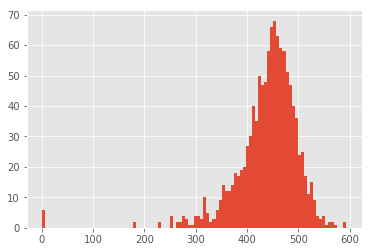

In [1073]:
master.Case_Rate.hist(bins=100);

In [1074]:
fips = master.FIPS
scope=['Arkansas', 'Alabama', 'Texas', 'Mississipi', 'Louisiana', 'Tennessee', 'North Carolina', 'South Caroline', 'Virginia', 'Florida']
values =master.Case_Rate.astype(int)
fig = ff.create_choropleth(fips=fips, values=values, 
                           scope=scope,
                           binning_endpoints = [50, 100, 200, 300, 400, 500, 600], 
                           colorscale = [
                            '#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#980043','#67001f'
                           ],
                           county_outline={'color': 'white', 'width': 0.25},
                           legend_title='Cases per 100,000', 
                            title='Average Annual Rate of New Cases per 100,000 (20011-2015)'
)
py.iplot(fig, filename='Average Annual Rate of New Cases per 100,000 (20011-2015)')

In [1075]:
master_TN = master[master['State'] == 'Tennessee']

#values = master_TN['TOT_POP'].tolist()
#fips = df_sample_r['FIPS'].tolist()

values = master_TN.Case_Rate.astype(int)

fips = master_TN.FIPS
scope=['Tennessee']

fig = ff.create_choropleth(fips=fips, values=values, 
                           scope=scope,
                           binning_endpoints = [50, 100, 200, 300, 400, 500, 600], 
                           colorscale = [
                            '#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#980043','#67001f'
                           ],
                           county_outline={'color': 'white', 'width': 0.5},
                           legend_title='Cases per 100,000', 
                            title='TN: Average Annual Rate of New Cases per 100,000 (20011-2015)'
)
py.iplot(fig, filename='TN: Average Annual Rate of New Cases per 100,000 (20011-2015)')

In [1041]:
fips = master.FIPS
scope=['Arkansas', 'Alabama', 'Texas', 'Mississipi', 'Louisiana', 'Tennessee', 'North Carolina', 'South Caroline', 'Virginia', 'Florida']
values =master.Death_Rate.astype(int)
fig = ff.create_choropleth(fips=fips, values=values, 
                           scope=scope,
                           binning_endpoints = [10, 50, 100, 150, 200, 300, 400], 
                           colorscale = [
                            '#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#980043','#67001f'
                           ],
                           county_outline={'color': 'white', 'width': 0.25},
                           legend_title='Cases per 100,000', 
                            title='Average Annual Rate of New Cases per 100,000 (20011-2015)'
)
py.iplot(fig, filename='Average Annual Rate of New Cases per 100,000 (20011-2015)')

In [1042]:
#ax = sns.swarmplot(x= 'State', y = 'Deaths_AgeAdj_Rate', hue="Presence_of_violation", data = master)

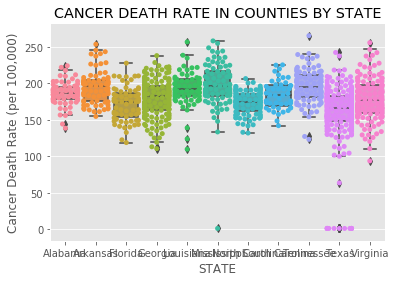

In [1043]:
#Cancer death rate by state
#data = master.sort_values(by=['Death_Rate'])
ax = sns.swarmplot(x= 'State', y = 'Death_Rate', data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Death_Rate"], ascending = False)))
ax = sns.boxplot(x= 'State', y = 'Death_Rate', data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Death_Rate"], ascending = False)))
ax.set(xlabel='STATE', ylabel='Cancer Death Rate (per 100,000)', title= 'CANCER DEATH RATE IN COUNTIES BY STATE')
plt.show()

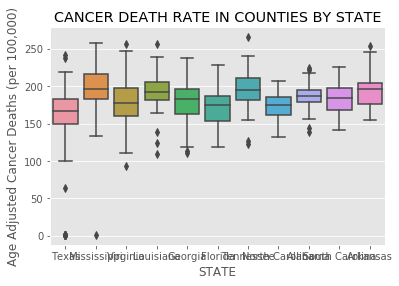

In [1044]:
#Cancer death rate by state
#data = master.sort_values(by=['Death_Rate'])
#ax = sns.barplot(x= 'State', y = 'Death_Rate', data = master.sort_values(by=['Death_Rate']))
ax = sns.boxplot(x= 'State', y = 'Death_Rate', data = master.sort_values(by=['Death_Rate']))
ax.set(xlabel='STATE', ylabel='Age Adjusted Cancer Deaths (per 100,000)', title= 'CANCER DEATH RATE IN COUNTIES BY STATE')
plt.show()

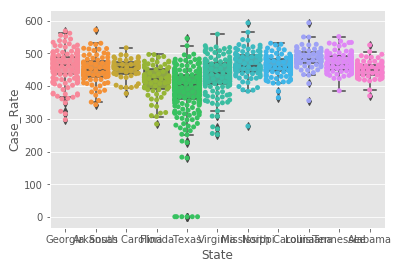

In [1045]:
#Cancer newcases rate by state
ax = sns.swarmplot(x= 'State', y = 'Case_Rate', data = master)
ax = sns.boxplot(x= 'State', y = 'Case_Rate', data = master)
plt.show()

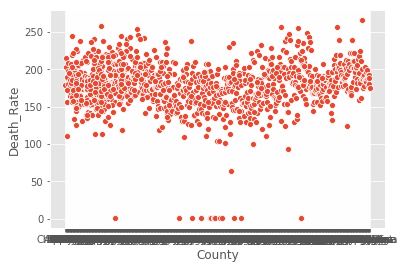

In [1046]:
ax = sns.scatterplot(x= 'County', y = 'Death_Rate', data = master)
plt.show()

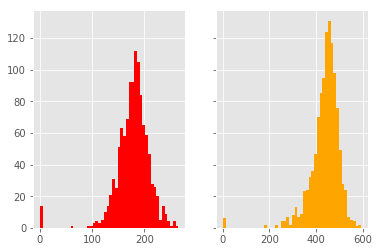

In [1047]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=False)
n_bins = 50
axs[0].hist(master.Death_Rate, bins=n_bins, color = 'red')
axs[1].hist(master.Case_Rate, bins=n_bins, color= 'orange')
plt.show();

## Segregating the determinants based on their category. Socio-eco and physical environment, clinical-care, health-behaviors and health-outcomes-indicators.

In [1078]:
# Health behaviors and co-morbidity
X_health = master.drop(['FIPS', 'State', 'County', 'Life_Expectancy', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'MV_Mortality_Rate','pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Household_Income', 'pct_Homeowners','Income_Ratio','pct_below_18', 'pct_65_and_over', 'pct_African_American',
       'pct_American_Indian_Alaskan_Native', 'pct_Asian','pct_Native_Hawaiian_Other_Pacific_Islander', 'pct_Hispanic',
       'pct_Non_Hispanic_White', 'Years_of_Potential_Life_Lost_Rate','pct_Fair_Poor', 'Physically_Unhealthy_Days', 
        'pct_LBW','pct_Alcohol_Impaired', 'Mentally_Unhealthy_Days', 'pct_Uninsured', 'PCP_Rate','Food_Environment_Index',
       'Dentist_Rate', 'MHP_Rate', 'Preventable_Hosp._Rate','Graduation_Rate', 'pct_Some_College', 'pct_access_excercise',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5', 
        'pct_Severe_Housing_Problems', 'pct_Screened', 'pct_Vaccinated'], axis=1)

In [1079]:
X_health.columns

Index(['pct_Diabetic', 'HIV_Prevalence_Rate', 'Drug_Overdose_Mortality_Rate',
       'pct_Insufficient_Sleep', 'pct_Smokers', 'pct_Obese',
       'pct_Physically_Inactive', 'pct_Excessive_Drinking', 'Chlamydia_Rate',
       'Teen_Birth_Rate', 'Case_Rate', 'Death_Rate', 'BBL'],
      dtype='object')

In [1080]:
#Socio-economical and physical environment
X_SEP = master.drop(['FIPS', 'State', 'County', 'Life_Expectancy', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate', 'Drug_Overdose_Mortality_Rate', 
        'MV_Mortality_Rate', 'pct_Insufficient_Sleep', 'pct_below_18', 'pct_65_and_over', 'pct_African_American', 
        'pct_American_Indian_Alaskan_Native', 'pct_Asian','pct_Native_Hawaiian_Other_Pacific_Islander', 
        'pct_Hispanic','pct_Non_Hispanic_White', 'Years_of_Potential_Life_Lost_Rate',
       'pct_Fair_Poor', 'Physically_Unhealthy_Days', 'pct_LBW', 'pct_Smokers','pct_Obese', 'pct_Physically_Inactive', 
        'Mentally_Unhealthy_Days', 'pct_Excessive_Drinking', 'pct_Alcohol_Impaired',
       'Chlamydia_Rate', 'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate', 
        'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated'
        ], axis=1)

In [1081]:
X_SEP.columns

Index(['pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Household_Income', 'pct_Homeowners', 'Food_Environment_Index',
       'pct_access_excercise', 'Graduation_Rate', 'pct_Some_College',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Income_Ratio',
       'Violent_Crime_Rate', 'Injury_Death_Rate', 'Average_Daily_PM2.5',
       'pct_Severe_Housing_Problems', 'Case_Rate', 'Death_Rate', 'BBL'],
      dtype='object')

In [1082]:
#Clinical Care
X_clinic = master.drop(['FIPS', 'State', 'County', 'Life_Expectancy', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate','pct_Food_Insecure', 
        'pct_Limited_Access_to_healthy_foods','Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate', 
        'pct_Insufficient_Sleep', 'Household_Income', 'pct_Homeowners', 'pct_below_18', 'pct_65_and_over', 
        'pct_African_American', 'pct_American_Indian_Alaskan_Native', 'pct_Asian', 
        'pct_Native_Hawaiian_Other_Pacific_Islander', 'pct_Hispanic', 'pct_Non_Hispanic_White', 
        'Years_of_Potential_Life_Lost_Rate','pct_Fair_Poor', 'Physically_Unhealthy_Days', 'pct_LBW', 'pct_Smokers',
       'pct_Obese', 'Food_Environment_Index', 'pct_Physically_Inactive','pct_access_excercise', 'pct_Excessive_Drinking', 
        'pct_Alcohol_Impaired', 'Chlamydia_Rate', 'Teen_Birth_Rate', 'Mentally_Unhealthy_Days', 
       'Graduation_Rate', 'pct_Some_College','Income_Ratio','pct_Unemployed', 'pct_Children_in_Poverty', 
        'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5',
       'pct_Severe_Housing_Problems'], axis=1)

In [1083]:
X_clinic.columns

Index(['pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate',
       'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated', 'Case_Rate',
       'Death_Rate', 'BBL'],
      dtype='object')

In [1084]:
# Health outcomes
X_outcomes = master.drop(['FIPS', 'State', 'County', 'Life_Expectancy', 'Child_Mortality_Rate',
        'pct_Diabetic', 'HIV_Prevalence_Rate','pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate','pct_Insufficient_Sleep', 'Household_Income', 
        'pct_Homeowners', 'pct_below_18', 'pct_65_and_over', 'pct_African_American', 
        'pct_American_Indian_Alaskan_Native', 'pct_Asian', 'pct_Native_Hawaiian_Other_Pacific_Islander', 
        'pct_Hispanic', 'pct_Non_Hispanic_White', 'pct_Smokers','Income_Ratio','pct_Obese', 'Food_Environment_Index', 
        'pct_Physically_Inactive', 'pct_access_excercise', 'pct_Excessive_Drinking', 'pct_Alcohol_Impaired',
       'Chlamydia_Rate', 'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate', 
        'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated', 'Graduation_Rate', 'pct_Some_College',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5', 
        'pct_Severe_Housing_Problems'], axis=1)

In [1085]:
X_outcomes.columns

Index(['Infant_Mortality_Rate', 'Years_of_Potential_Life_Lost_Rate',
       'pct_Fair_Poor', 'Physically_Unhealthy_Days', 'Mentally_Unhealthy_Days',
       'pct_LBW', 'Case_Rate', 'Death_Rate', 'BBL'],
      dtype='object')

### Looking over the correlation of variables in each category with cancer rate

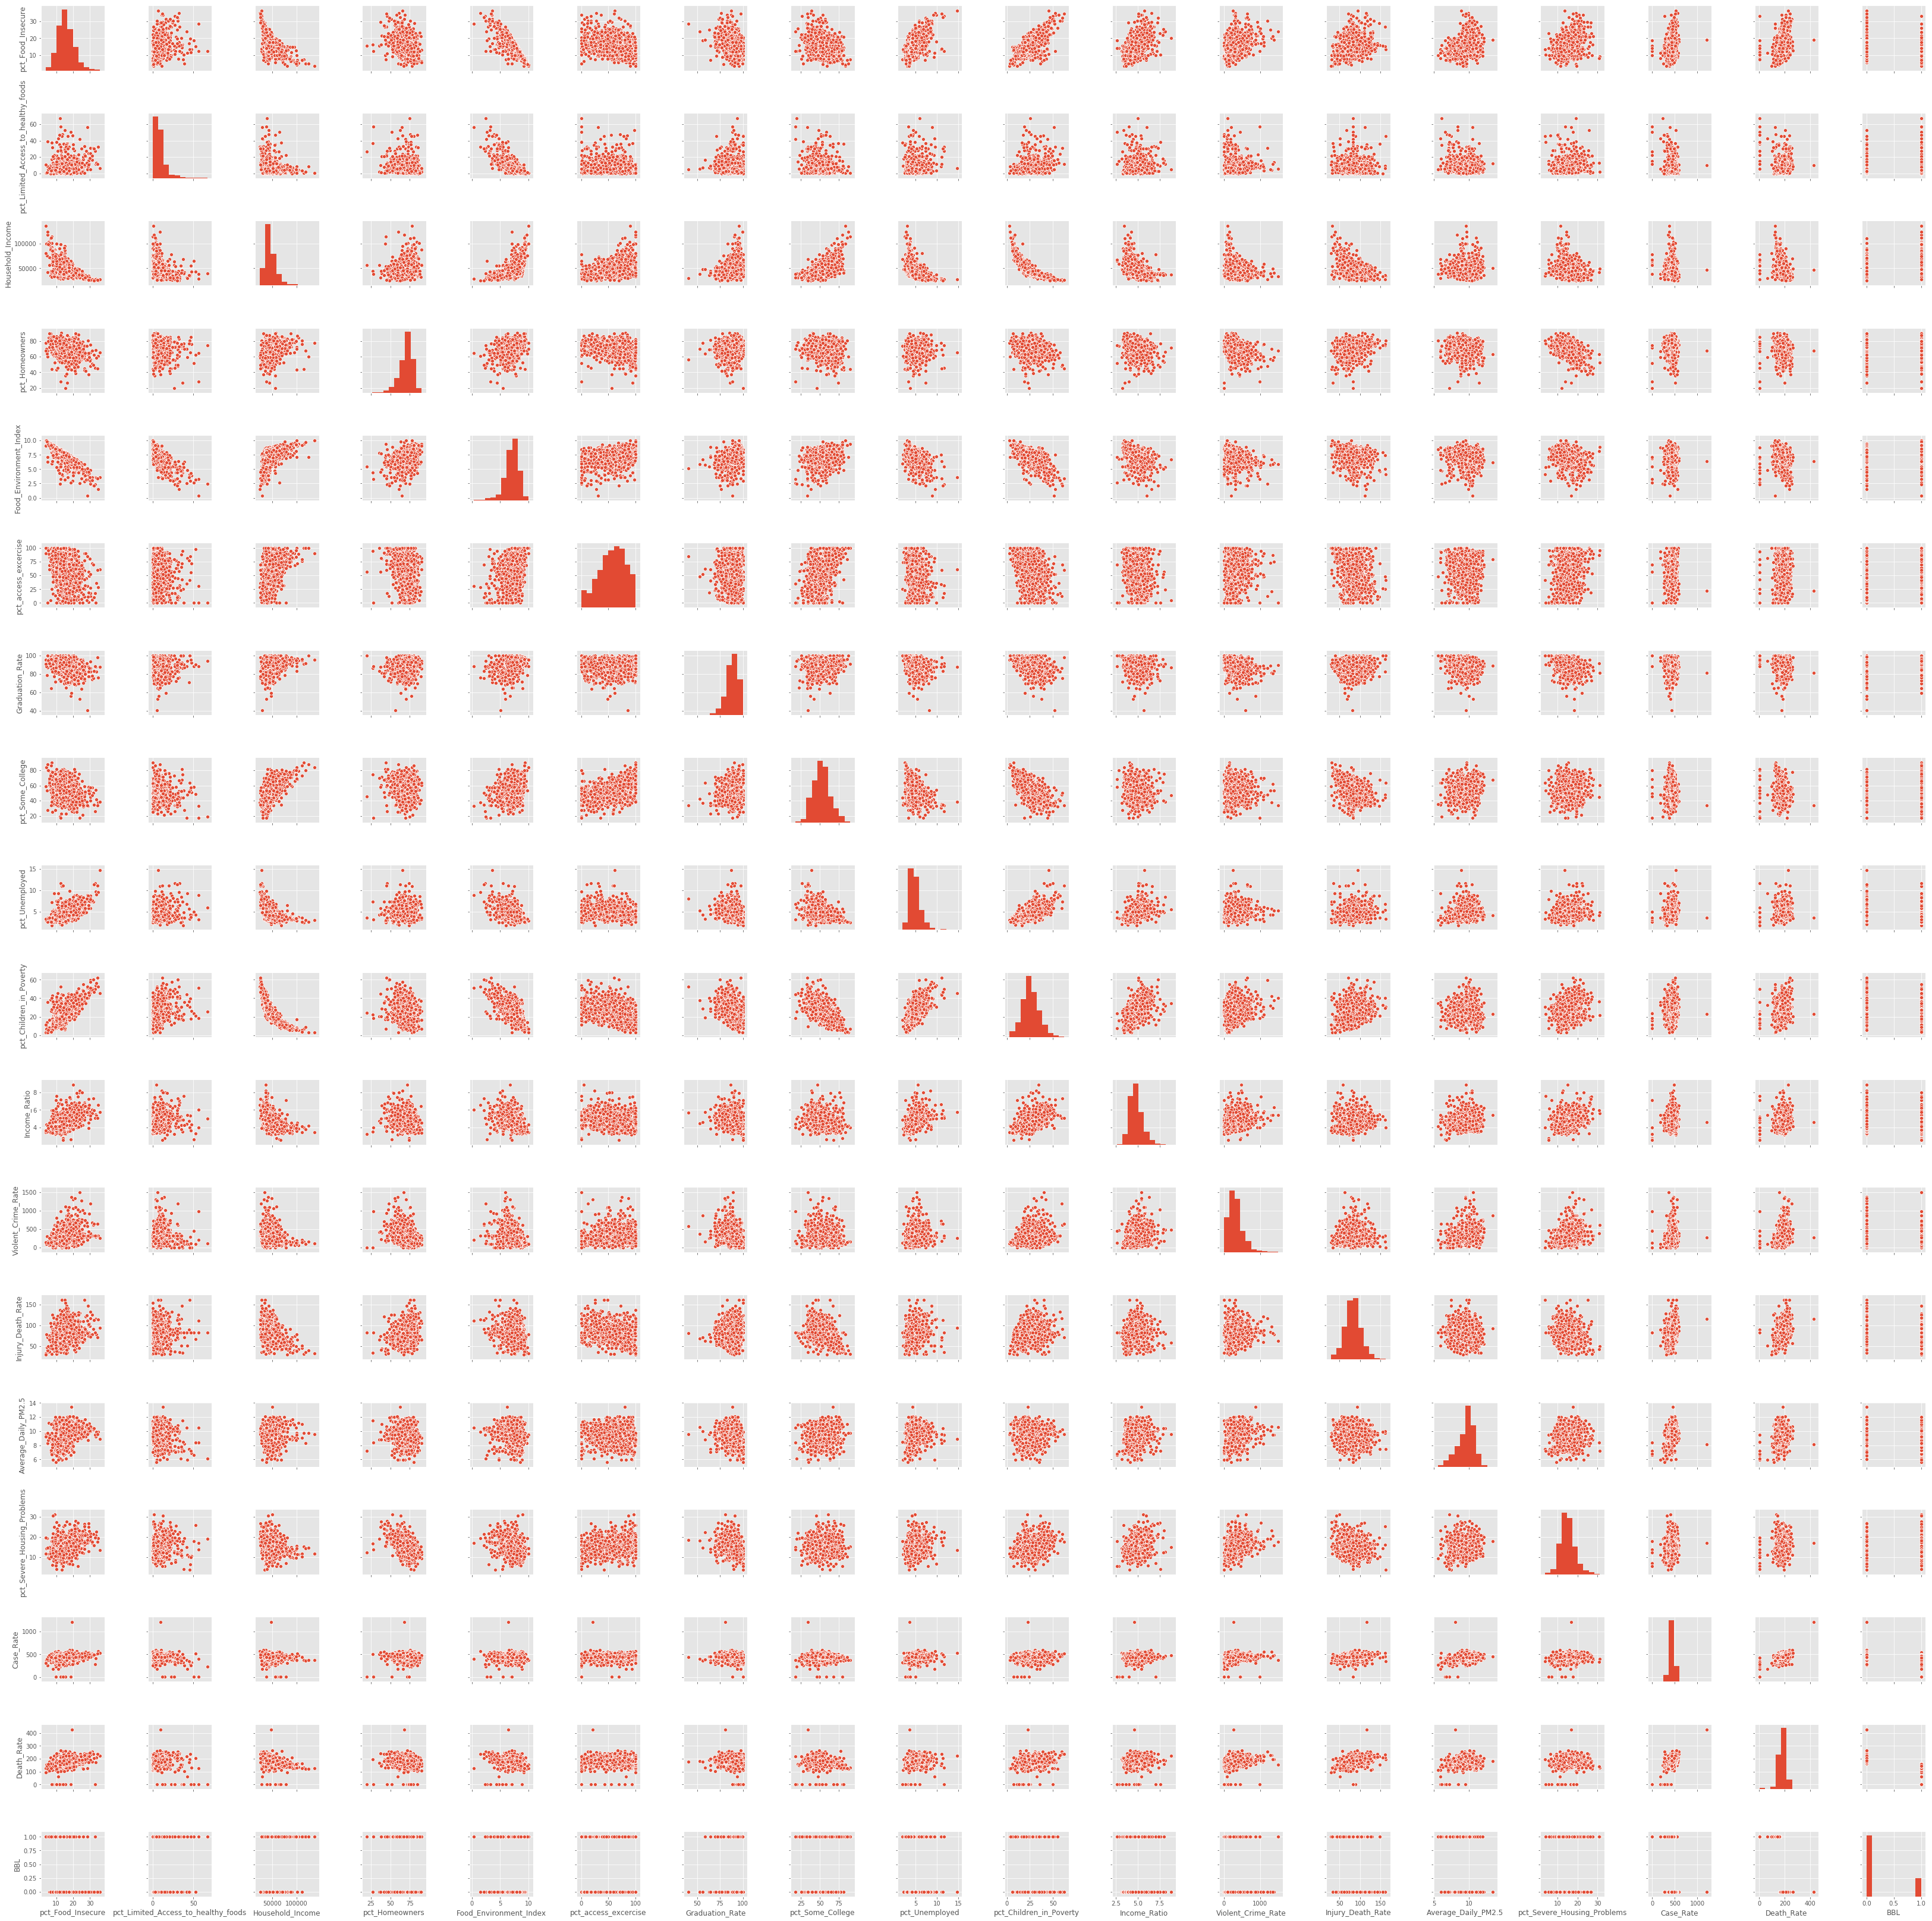

In [779]:
sns.pairplot(X_SEP)

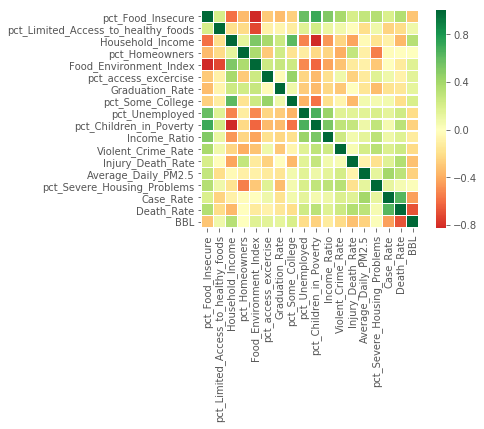

In [1086]:
sns.heatmap(X_SEP.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5);

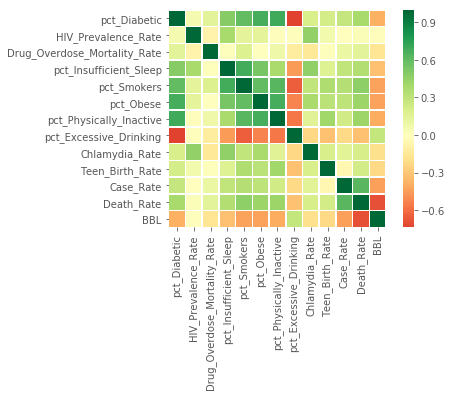

In [1087]:
sns.heatmap(X_health.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5);

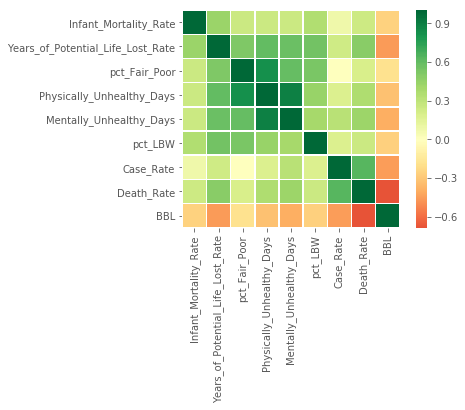

In [1088]:
sns.heatmap(X_outcomes.corr(), square=True, cmap='RdYlGn', center=0,linewidths=.5);

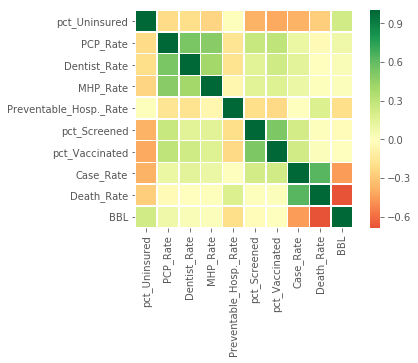

In [1089]:
sns.heatmap(X_clinic.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5);

# Modeling : 
## - Which feature can define county-wise disparity in cancer rate?
## - Can we predict the cancer rate by this feature(s)?
## - Finding the feature(s) to detect above/below base-line of cancer death rate.
## - Can we set up an actionable target of those features to those counties which have above base-line cancer death rate considering 10% decrease in the cancer death rate as a target?

In [1090]:
#Creating the target variable DataFrame where y_BBL is a labelled target variable.
y_death = pd.DataFrame(master.Death_Rate)
y_case = pd.DataFrame(master.Case_Rate)
y_BBL = pd.DataFrame(master.BBL)

In [1091]:
print(y_death.columns)
print(y_case.columns)
print(y_BBL.columns)
print(y_death.info())
print(y_case.info())
print(y_BBL.info())

Index(['Death_Rate'], dtype='object')
Index(['Case_Rate'], dtype='object')
Index(['BBL'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 1 columns):
Death_Rate    1142 non-null float64
dtypes: float64(1)
memory usage: 9.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 1 columns):
Case_Rate    1142 non-null float64
dtypes: float64(1)
memory usage: 9.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 1 columns):
BBL    1142 non-null int64
dtypes: int64(1)
memory usage: 9.0 KB
None


# Clinical care and cancer death rate/new case rate

In [1092]:
X_clinic.head()

pct_Uninsured   PCP_Rate  Dentist_Rate    MHP_Rate  Preventable_Hosp._Rate  \
0      17.608928  43.412200      16.19783   37.794940                  7080.0   
1      24.172885  47.606706      11.98753  105.250941                  7663.0   
2      18.625040  43.967640      26.50411    8.834700                  7038.0   
3      16.065054  47.606706       0.00000   31.250000                  7961.0   
4      15.034754  57.593480      40.08373  133.612430                  5451.0   

   pct_Screened  pct_Vaccinated  Case_Rate  Death_Rate  BBL  
0          37.0            30.0      402.5       179.5    0  
1          35.0            36.0      427.4       203.0    0  
2          36.0            32.0      452.9       215.3    0  
3          55.0            22.0      461.8       110.5    1  
4          40.0            40.0      479.0       188.5    0

In [1093]:
X_clinic.columns

Index(['pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate',
       'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated', 'Case_Rate',
       'Death_Rate', 'BBL'],
      dtype='object')

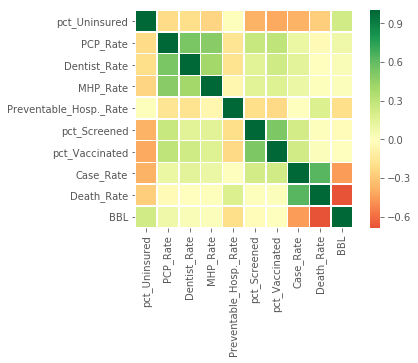

In [1094]:
sns.heatmap(X_clinic.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5);

### Linear Regression model : Clinical care features and Cancer New case rate

MSE 4990.667934141017
coeff                         0  Coefficient Estimate
0           pct_Uninsured             -4.042615
1                PCP_Rate             -0.172913
2            Dentist_Rate              0.287648
3                MHP_Rate             -0.014754
4  Preventable_Hosp._Rate             -0.000412
5            pct_Screened              0.567998
6          pct_Vaccinated              0.251699
R-Square 0.15698931164470056


Text(0.5, 1.0, 'Residual plot')

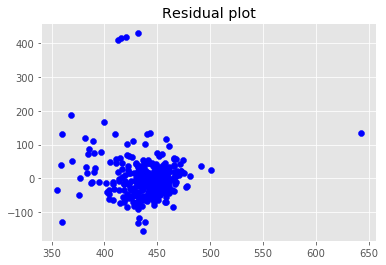

In [1095]:
# importing basic libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression


# New Case Rate
lreg = LinearRegression()
#X and y
X = X_clinic.loc[:,['pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate',
       'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated']]
y = X_clinic.Case_Rate


#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model

lreg.fit(X_train,y_train)

#predicting on cv

pred = lreg.predict(X_test)

#calculating mse
mse = np.mean((pred - y_test)**2)
print('MSE', mse)

# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

#plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')


### Linear Regression model : Clinical care features and Cancer death rate

MSE 1133.910931394258
coeff                         0  Coefficient Estimate
0           pct_Uninsured             -2.166283
1                PCP_Rate             -0.084704
2            Dentist_Rate              0.028677
3                MHP_Rate             -0.004829
4  Preventable_Hosp._Rate              0.002238
5            pct_Screened             -0.201539
6          pct_Vaccinated             -0.248172
R-Square 0.12948318143043724


Text(0.5, 1.0, 'Residual plot')

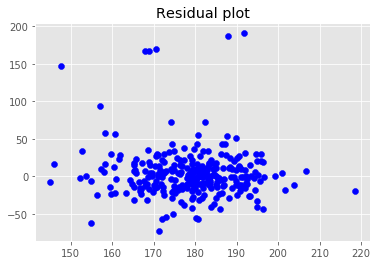

In [1096]:
# Death Rate
lreg = LinearRegression()
#X and y
X = X_clinic.loc[:,['pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate',
       'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated']]
y = X_clinic.Death_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model

lreg.fit(X_train,y_train)

#predicting on cv

pred = lreg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
print('MSE', mse)
# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

# plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')


## All categories and all features and death rate linear regression model

MSE 680.4481261435683
coeff                                              0  Coefficient Estimate
0                              Life_Expectancy             -5.631092
1                         Child_Mortality_Rate             -0.057502
2                        Infant_Mortality_Rate              0.558288
3                                 pct_Diabetic             -0.101631
4                          HIV_Prevalence_Rate             -0.009336
5                            pct_Food_Insecure              0.102568
6          pct_Limited_Access_to_healthy_foods             -0.636231
7                 Drug_Overdose_Mortality_Rate              0.031755
8                            MV_Mortality_Rate             -0.141001
9                       pct_Insufficient_Sleep             -0.150717
10                            Household_Income             -0.000154
11                              pct_Homeowners              0.422354
12                                pct_below_18             -0.379676
13    

Text(0.5, 1.0, 'Residual plot')

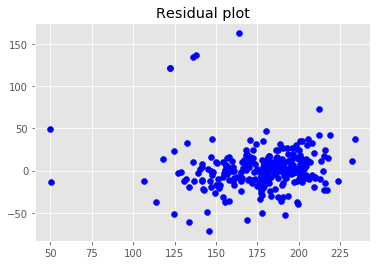

In [1097]:
# Death Rate
lreg = LinearRegression()
#X and y

X = master.drop(['FIPS', 'State', 'County', 'Case_Rate', 'Death_Rate', 'BBL'], axis =1)
y = master.Death_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model

lreg.fit(X_train,y_train)

#predicting on cv

pred = lreg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
print('MSE', mse)
# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))
#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

#plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

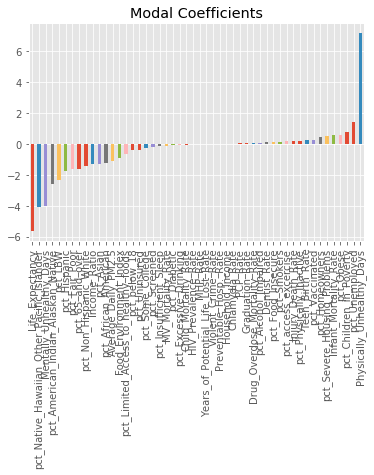

In [1098]:
#checking the magnitude of coefficients

predictors = X_train.columns

coef = Series(lreg.coef_, predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

MSE 3568.444825901859
coeff                                              0  Coefficient Estimate
0                              Life_Expectancy             -6.151080
1                         Child_Mortality_Rate              0.058885
2                        Infant_Mortality_Rate             -2.340928
3                                 pct_Diabetic              0.245991
4                          HIV_Prevalence_Rate              0.002304
5                            pct_Food_Insecure              0.199678
6          pct_Limited_Access_to_healthy_foods              0.375182
7                 Drug_Overdose_Mortality_Rate              0.152028
8                            MV_Mortality_Rate             -0.329953
9                       pct_Insufficient_Sleep             -2.154463
10                            Household_Income              0.000123
11                              pct_Homeowners              0.307565
12                                pct_below_18              1.423597
13    

Text(0.5, 1.0, 'Residual plot')

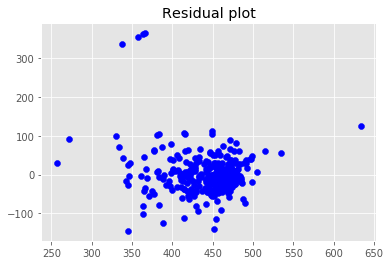

In [1099]:
# New Case Rate
lreg = LinearRegression()
#X and y

X = master.drop(['FIPS', 'State', 'County','Case_Rate', 'Death_Rate', 'BBL'], axis =1)
y = master.Case_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model

lreg.fit(X_train,y_train)

#predicting on test

pred = lreg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
print('MSE', mse)
# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

#plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')



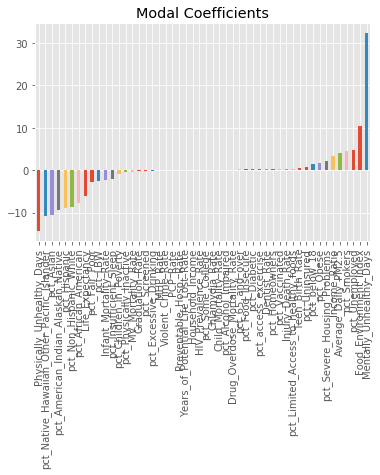

In [1100]:
#checking the magnitude of coefficients

predictors = X_train.columns

coef = Series(lreg.coef_, predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

## Ridge

MSE 3631.763973490387
coeff                                              0  Coefficient Estimate
0                              Life_Expectancy             -6.151080
1                         Child_Mortality_Rate              0.058885
2                        Infant_Mortality_Rate             -2.340928
3                                 pct_Diabetic              0.245991
4                          HIV_Prevalence_Rate              0.002304
5                            pct_Food_Insecure              0.199678
6          pct_Limited_Access_to_healthy_foods              0.375182
7                 Drug_Overdose_Mortality_Rate              0.152028
8                            MV_Mortality_Rate             -0.329953
9                       pct_Insufficient_Sleep             -2.154463
10                            Household_Income              0.000123
11                              pct_Homeowners              0.307565
12                                pct_below_18              1.423597
13    

Text(0.5, 1.0, 'Residual plot')

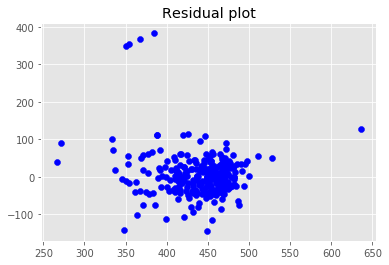

In [1101]:
from sklearn.linear_model import Ridge
#Data sets
X = master.drop(['FIPS', 'State', 'County','Case_Rate', 'Death_Rate', 'BBL'], axis =1)
y = master.Case_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

#predicting on test
pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
print('MSE', mse)
# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

#plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')



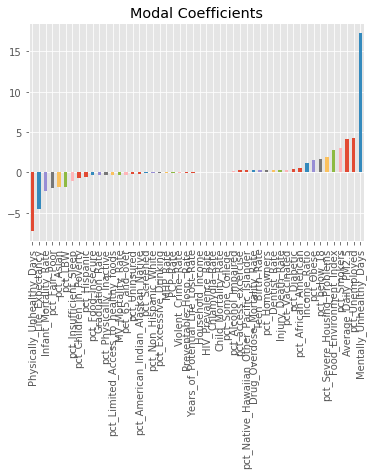

In [1102]:
#checking the magnitude of coefficients

predictors = X_train.columns

coef = Series(ridgeReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')


MSE 705.3156965599536
coeff                                              0  Coefficient Estimate
0                              Life_Expectancy             -6.151080
1                         Child_Mortality_Rate              0.058885
2                        Infant_Mortality_Rate             -2.340928
3                                 pct_Diabetic              0.245991
4                          HIV_Prevalence_Rate              0.002304
5                            pct_Food_Insecure              0.199678
6          pct_Limited_Access_to_healthy_foods              0.375182
7                 Drug_Overdose_Mortality_Rate              0.152028
8                            MV_Mortality_Rate             -0.329953
9                       pct_Insufficient_Sleep             -2.154463
10                            Household_Income              0.000123
11                              pct_Homeowners              0.307565
12                                pct_below_18              1.423597
13    

Text(0.5, 1.0, 'Residual plot')

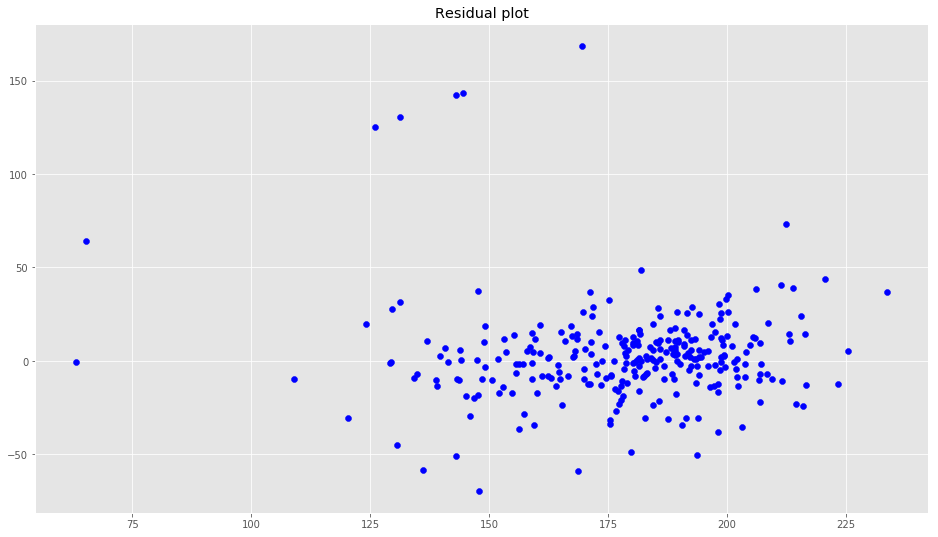

In [1131]:
#Data sets
X = master.drop(['FIPS', 'State', 'County', 'Case_Rate', 'Death_Rate', 'BBL'], axis =1)
y = master.Death_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

#predicting on test
pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
print('MSE', mse)
# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

#plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

# Class based modeling

In [1132]:
master.BBL.value_counts(normalize=True)

0    0.768827
1    0.231173
Name: BBL, dtype: float64

In [1133]:
from plotly.plotly import iplot
import cufflinks as cf
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')
#! pip install cufflinks --upgrade
cf.__version__

'0.15'

In [1105]:
labels = ['Below Base-line','Above Base-line']
values = [23.1173, 76.8827]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

#### Another thing to look at is high cardinality features. If we have more than 100 categories for each of these features, it won’t be very useful to use them. It would add dimensions to our dataset and we don’t want to do that.

In [1163]:
X = pd.DataFrame(master.drop(['FIPS', 'State', 'County','Case_Rate','Death_Rate', 'BBL'], axis =1))
#X = master.Injury_Death_Rate.values
y = master.BBL

In [1164]:
max_cardinality = 100
high_cardinality = [col for col in X.select_dtypes(exclude=np.number)
                   if X[col].nunique() > max_cardinality]
X = X.drop(columns=high_cardinality)
#X.info()

### So, we did not have and dropped any features with high cardinality. All the features are float or int64. The int and float objects can just be used as is.

Logistic Regression
Logistic Regression is great for multiclass classification because Scikit-learn encodes encodes the target labels automatically if they are strings. When you’re working with a learning model, it is important to scale the features to a range which is centered around zero. Scaling will make sure the variance of the features are in the same range.

In [1159]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
#X = X.drop(columns='id') #id is our index and won't help our model
X = scale(X) 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

## Logistic Regression 

In [1160]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
#Calculating score of the model
print('Model Score :', model.score(X_test, y_test))
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,logreg.predict(X_test)))

Model Score : 0.6608391608391608
Train accuracy score: 0.8679906542056075
Test accuracy score: 0.8741258741258742


## DecisionTree Classifier

In [1162]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
#Calculating score of the model
print('Model Score :', model.score(X_test, y_test))
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,logreg.predict(X_test)))

Model Score : 0.6608391608391608
Train accuracy score: 0.8679906542056075
Test accuracy score: 0.8741258741258742


## CatBoost

In [1165]:
X_SEP.columns

Index(['pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Household_Income', 'pct_Homeowners', 'Food_Environment_Index',
       'pct_access_excercise', 'Graduation_Rate', 'pct_Some_College',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Income_Ratio',
       'Violent_Crime_Rate', 'Injury_Death_Rate', 'Average_Daily_PM2.5',
       'pct_Severe_Housing_Problems', 'Case_Rate', 'Death_Rate', 'BBL'],
      dtype='object')

In [1113]:
X = pd.DataFrame(X_SEP.drop(['Case_Rate', 'Death_Rate','BBL'], axis =1))
#X = master.Injury_Death_Rate.values
y = X_SEP.BBL

In [1114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 15 columns):
pct_Food_Insecure                      1142 non-null float64
pct_Limited_Access_to_healthy_foods    1142 non-null float64
Household_Income                       1142 non-null int64
pct_Homeowners                         1142 non-null float64
Food_Environment_Index                 1142 non-null float64
pct_access_excercise                   1142 non-null float64
Graduation_Rate                        1142 non-null float64
pct_Some_College                       1142 non-null float64
pct_Unemployed                         1142 non-null float64
pct_Children_in_Poverty                1142 non-null float64
Income_Ratio                           1142 non-null float64
Violent_Crime_Rate                     1142 non-null float64
Injury_Death_Rate                      1142 non-null float64
Average_Daily_PM2.5                    1142 non-null float64
pct_Severe_Housing_Problems            11

In [1115]:
X = scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [1120]:
#Creating catboost model
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error
from catboost import Pool
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from pandas_ml import ConfusionMatrix
#! pip install pandas-ml
model = CatBoostClassifier(iterations=300, boosting_type='Ordered', task_type="CPU")

In [1121]:
model.fit(X_train, y_train, silent=True)

In [1122]:
#Making predictions and calculating mean absolute error
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mean_absolute_error(y_pred, y_test)

0.14685314685314685

In [1123]:
#Calculating score of the model
model.score(X_test, y_test)

0.8531468531468531

In [1124]:
#Printing confusion mmatrix
confusion_matrix(y_test, y_pred)

array([[207,  13],
       [ 29,  37]])

In [1125]:
# Printing confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print(TN, FP, FN, TP)
n = TN + FP + FN + TP

207 13 29 37


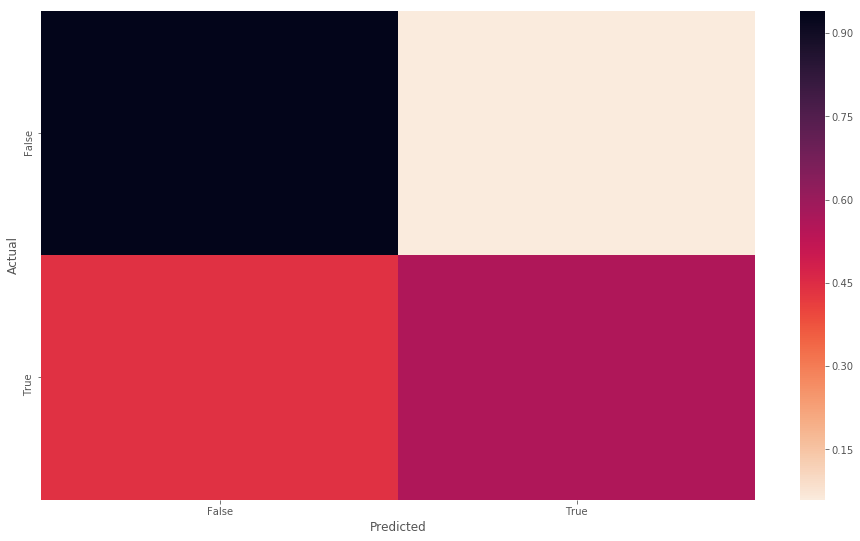

In [1126]:
plt.rcParams["figure.figsize"] = (16,9)
cmap = sns.cm.rocket_r
conf = ConfusionMatrix(y_test.tolist(), y_pred)
conf.plot(backend='seaborn', normalized = True, cmap=cmap);

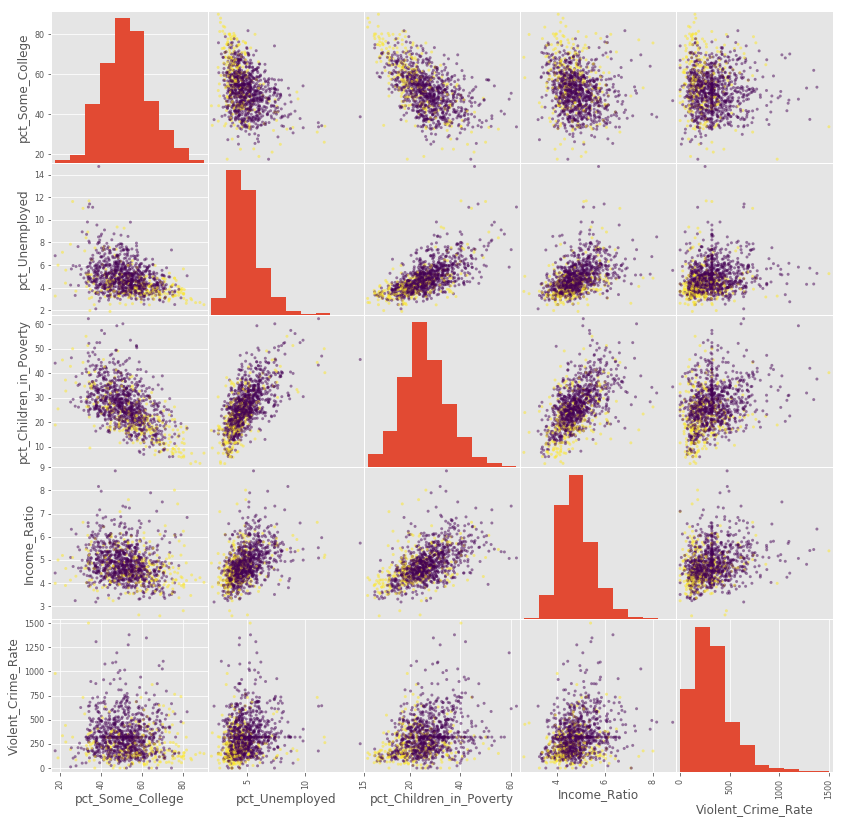

In [1011]:
c = master.BBL
_=pd.plotting.scatter_matrix(master.iloc[:, 45:50], c = c, figsize= [14,14])